## Project - 2 - Car Price Prediction

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
#checking working directory and than changing it to desirable place

In [2]:
pwd

'C:\\Users\\vaish'

In [3]:
import os
os.chdir("E:\\JOB\\OASIS info\\Data_Science\\3.Car_price_prediction")

In [4]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading the dataset
data = pd.read_csv("car data.csv")

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#getting to know the dataset
data.shape

(301, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#checking for null values
data.isnull().sum() #no null values are there

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
data.duplicated().sum()

2

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
#again checking if duplicates are there are not
data.duplicated().sum()

0

**Data Cleaning, EDA and Vizualization**

In [13]:
#getting to know about selling type and transmission
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
#getting to know about selling type and transmission
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

We can see here that, **car_name** , **selling_type** and **transmission** are not necessasy features. We can drop those three.The price of car will not depend on these three feature. But, Fuel_type is indeed a factor affecting the price of a car. So, we need to convert it into numerical type by encoding. 

We will check **unique** values for all variables to get useful information for encoding.

In [15]:
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

The dataset has **16** year of car data with **98** unique car details having **3** different fuel type.

In [16]:
unique_values = {}
for column in ['Fuel_Type', 'Transmission', 'Owner']:
    unique_values[column] = data[column].unique()

unique_values

{'Fuel_Type': array(['Petrol', 'Diesel', 'CNG'], dtype=object),
 'Transmission': array(['Manual', 'Automatic'], dtype=object),
 'Owner': array([0, 1, 3], dtype=int64)}

In [17]:
data['Fuel_Type'] = data['Fuel_Type'].replace({'Petrol':0, 'Diesel':1, 'CNG':2})
data['Transmission'] = data['Transmission'].replace({'Manual':0, 'Automatic':1})

In [18]:
data = data.drop(['Car_Name', 'Owner'] , axis =1)

We can add some other features in dataset on which selling price of car depends. Like how many years the car has been in used. Also, milage of the car is indeed an important parameter.

In [19]:
data['Car used in years'] = 2024 - data['Year']

In [20]:
data['Milage'] = data['Driven_kms'] / data['Car used in years']

In [21]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Car used in years,Milage
0,2014,3.35,5.59,27000,0,Dealer,0,10,2700.000000
1,2013,4.75,9.54,43000,1,Dealer,0,11,3909.090909
2,2017,7.25,9.85,6900,0,Dealer,0,7,985.714286
3,2011,2.85,4.15,5200,0,Dealer,0,13,400.000000
4,2014,4.60,6.87,42450,1,Dealer,0,10,4245.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               299 non-null    int64  
 1   Selling_Price      299 non-null    float64
 2   Present_Price      299 non-null    float64
 3   Driven_kms         299 non-null    int64  
 4   Fuel_Type          299 non-null    int64  
 5   Selling_type       299 non-null    object 
 6   Transmission       299 non-null    int64  
 7   Car used in years  299 non-null    int64  
 8   Milage             299 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 23.4+ KB


In [23]:
num = data.select_dtypes(include =['int64', 'float64']) #numerical data
num

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Car used in years,Milage
0,2014,3.35,5.59,27000,0,0,10,2700.000000
1,2013,4.75,9.54,43000,1,0,11,3909.090909
2,2017,7.25,9.85,6900,0,0,7,985.714286
3,2011,2.85,4.15,5200,0,0,13,400.000000
4,2014,4.60,6.87,42450,1,0,10,4245.000000
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,8,4248.500000
297,2015,4.00,5.90,60000,0,0,9,6666.666667
298,2009,3.35,11.00,87934,0,0,15,5862.266667
299,2017,11.50,12.50,9000,1,0,7,1285.714286


In [24]:
#checking the statistical summary and data distribution
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Car used in years,Milage
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.207358,0.130435,10.384615,3314.368276
std,2.896868,4.984240,8.566332,39015.170352,0.422297,0.337346,2.896868,2622.185064
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,6.000000,62.500000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000,0.000000,8.000000,1650.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000,0.000000,10.000000,3000.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000,0.000000,12.000000,4445.722222
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,21.000000,31250.000000


From the satsitical measure of features, it is necessary to see for the outliers and data distribution.

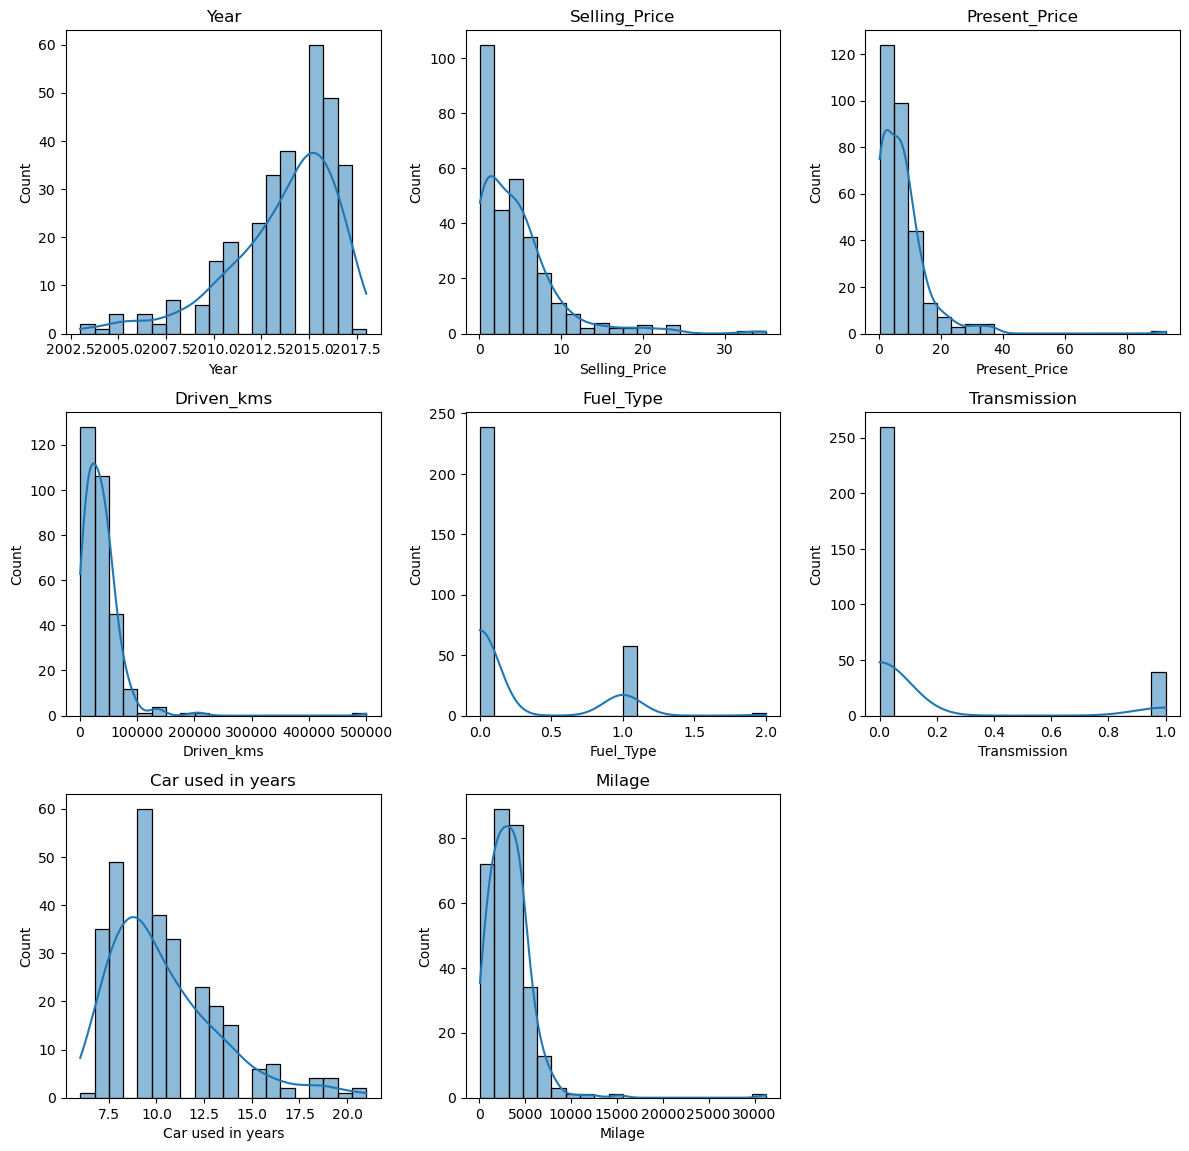

In [25]:
#data distirbution
plt.figure(figsize = (12,15))
for i, feature in enumerate(num.columns):
    plt.subplot(4,3, i+1)
    sns.histplot(data = data[feature] , bins = 20,  kde = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

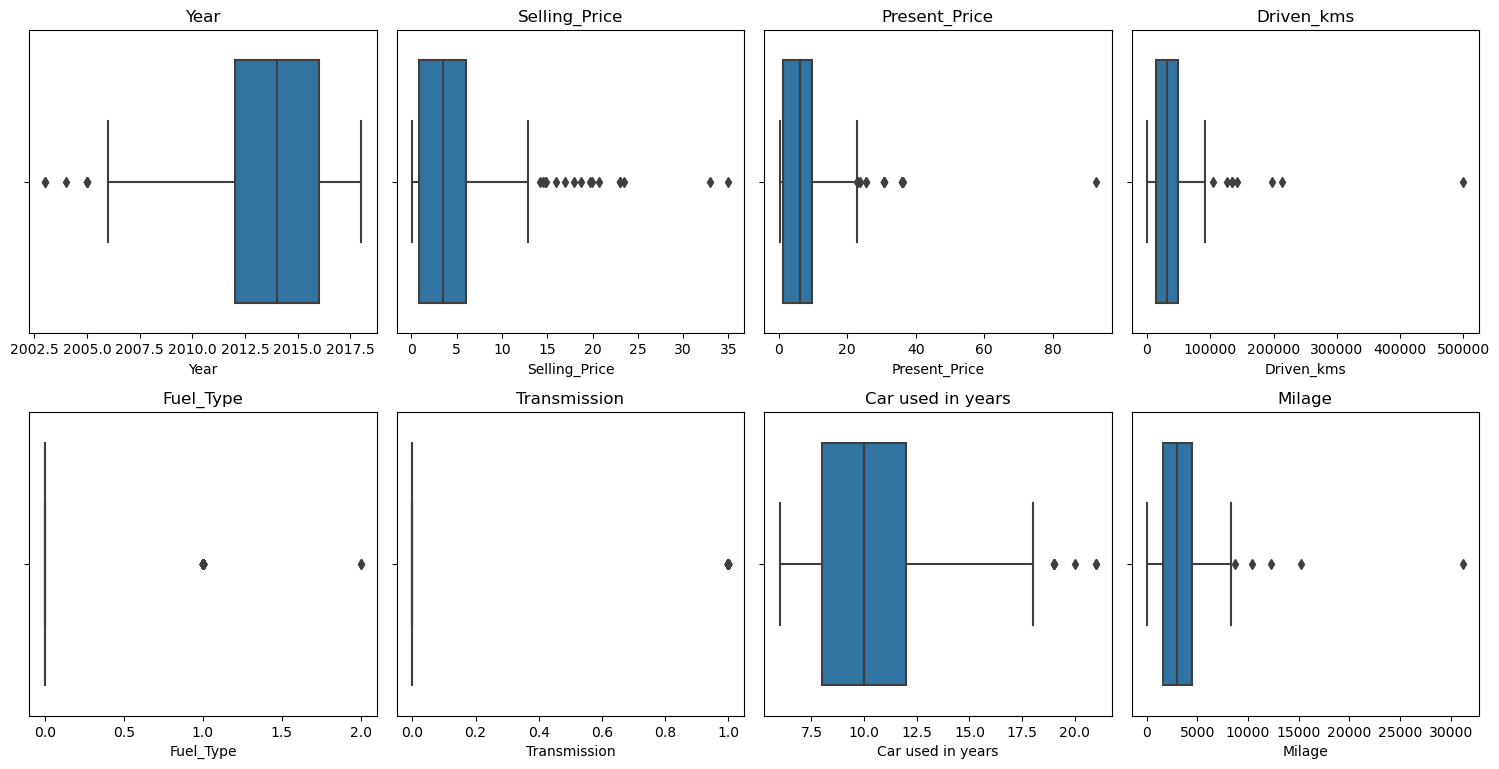

In [26]:
plt.figure(figsize=(15,15))
for i, f in enumerate(num.columns):
    plt.subplot(4,4, i+1)
    sns.boxplot(x= num[f])
    plt.title(f)
plt.tight_layout()
plt.show()

In [27]:
# Calculate quartiles
q1 = num.quantile(0.25)  # First quartile (25th percentile)
q3 = num.quantile(0.75)  # Third quartile (75th percentile)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate lower and upper bounds
lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR

# Counting the number of outliers
outliers = ((num < lb) | (num > ub)).sum()

# Counting percentage
outlier_percentage = (outliers / len(num)) * 100

print("Percentage of outliers:")
print(outlier_percentage)


Percentage of outliers:
Year                  2.341137
Selling_Price         5.351171
Present_Price         4.682274
Driven_kms            2.675585
Fuel_Type            20.066890
Transmission         13.043478
Car used in years     2.341137
Milage                1.672241
dtype: float64


Looking into the percentage of outliers, there is no need to remove the outliers. Fuel type and transmission have higher values but there are ccategorical type so no need to consider any outliers.

In [28]:
num.corr() #finding correlation between columns or variables

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Car used in years,Milage
Year,1.000000,0.234369,-0.053167,-0.525714,0.046210,-0.003434,-1.000000,-0.329997
Selling_Price,0.234369,1.000000,0.876305,0.028566,0.500292,0.348869,-0.234369,0.141689
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.431887,0.334326,0.053167,0.262941
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.167287,0.163881,0.525714,0.945809
Fuel_Type,0.046210,0.500292,0.431887,0.167287,1.000000,0.068618,-0.046210,0.273375
Transmission,-0.003434,0.348869,0.334326,0.163881,0.068618,1.000000,0.003434,0.158932
Car used in years,-1.000000,-0.234369,0.053167,0.525714,-0.046210,0.003434,1.000000,0.329997
Milage,-0.329997,0.141689,0.262941,0.945809,0.273375,0.158932,0.329997,1.000000


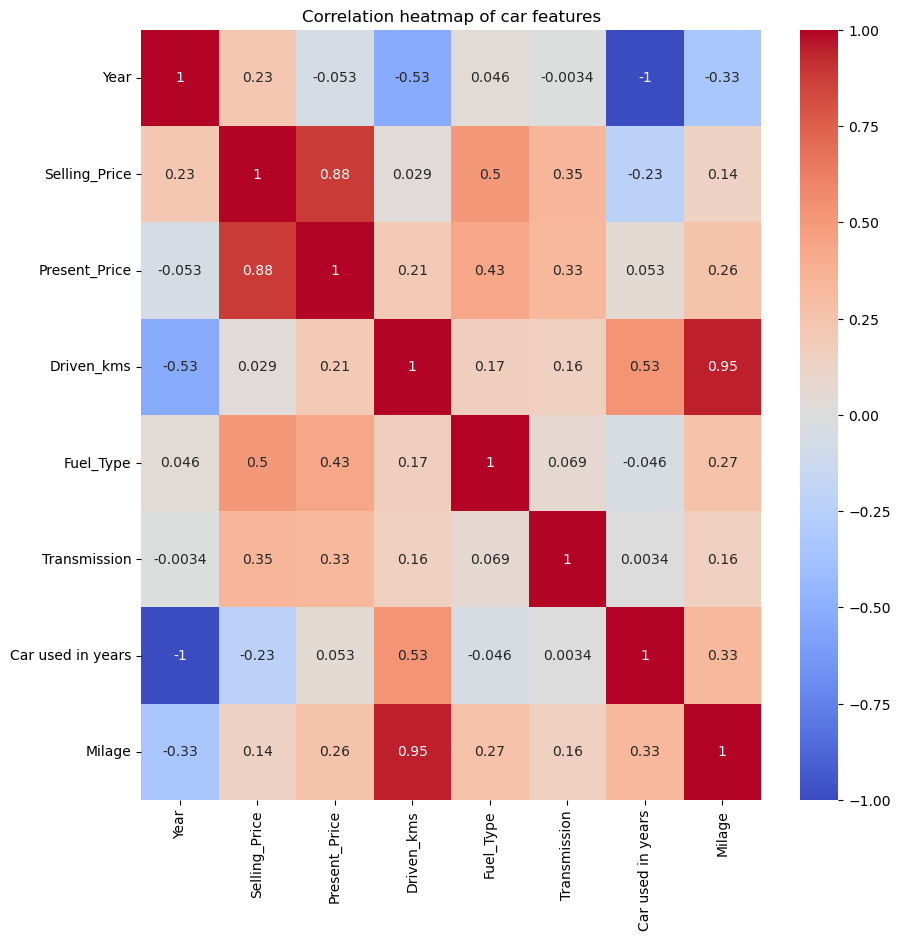

In [29]:
#vizualizing the correlation of numerical features
plt.figure(figsize = (10,10))
sns.heatmap(data = num.corr(), cmap = 'coolwarm', annot= True)
plt.title("Correlation heatmap of car features")
plt.show()

**Observations from Heatmap**

1. **Selling price** is highly positively correlated **88%** with **present price**, **50%** with **Fuel_type**. 
2. **Selling price** is slighly positively correlated **23%** with **Year**, **2.9%** with **Driven_kms**, and **35%** with **Transmission**. 
3. **Car used in year** is highly correlated **53%** with **Driven_kms**.
4. **Present price** is correlated positively **33%** with **Transmission**,  **21%** with **Driven kms** and **43%** with **Fuel type**.
5. **Milage** is positivley correlated slightly **14%** with **Selling_Price**, **26%** with **Present_Price**, **27%** with **Fuel_Type**, **16%** with **Transmission**, **33%** with **Car used in years** and highly correlated with **95%** of **Driven_kms**.

In [30]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Car used in years', 'Milage'],
      dtype='object')

**Car price prediction** problem is related with supervised machine learning problem. Because target variable is labeled "**selling price**". The problem is to predict the value, i.e. prediction problem. So, **Regression** algorithms will be helpful.

To identify **Linear** or **non linear** regression are used, we need to see the relationship of features with target data using scatter plots or any other vizualization like pairplot or linear plots.

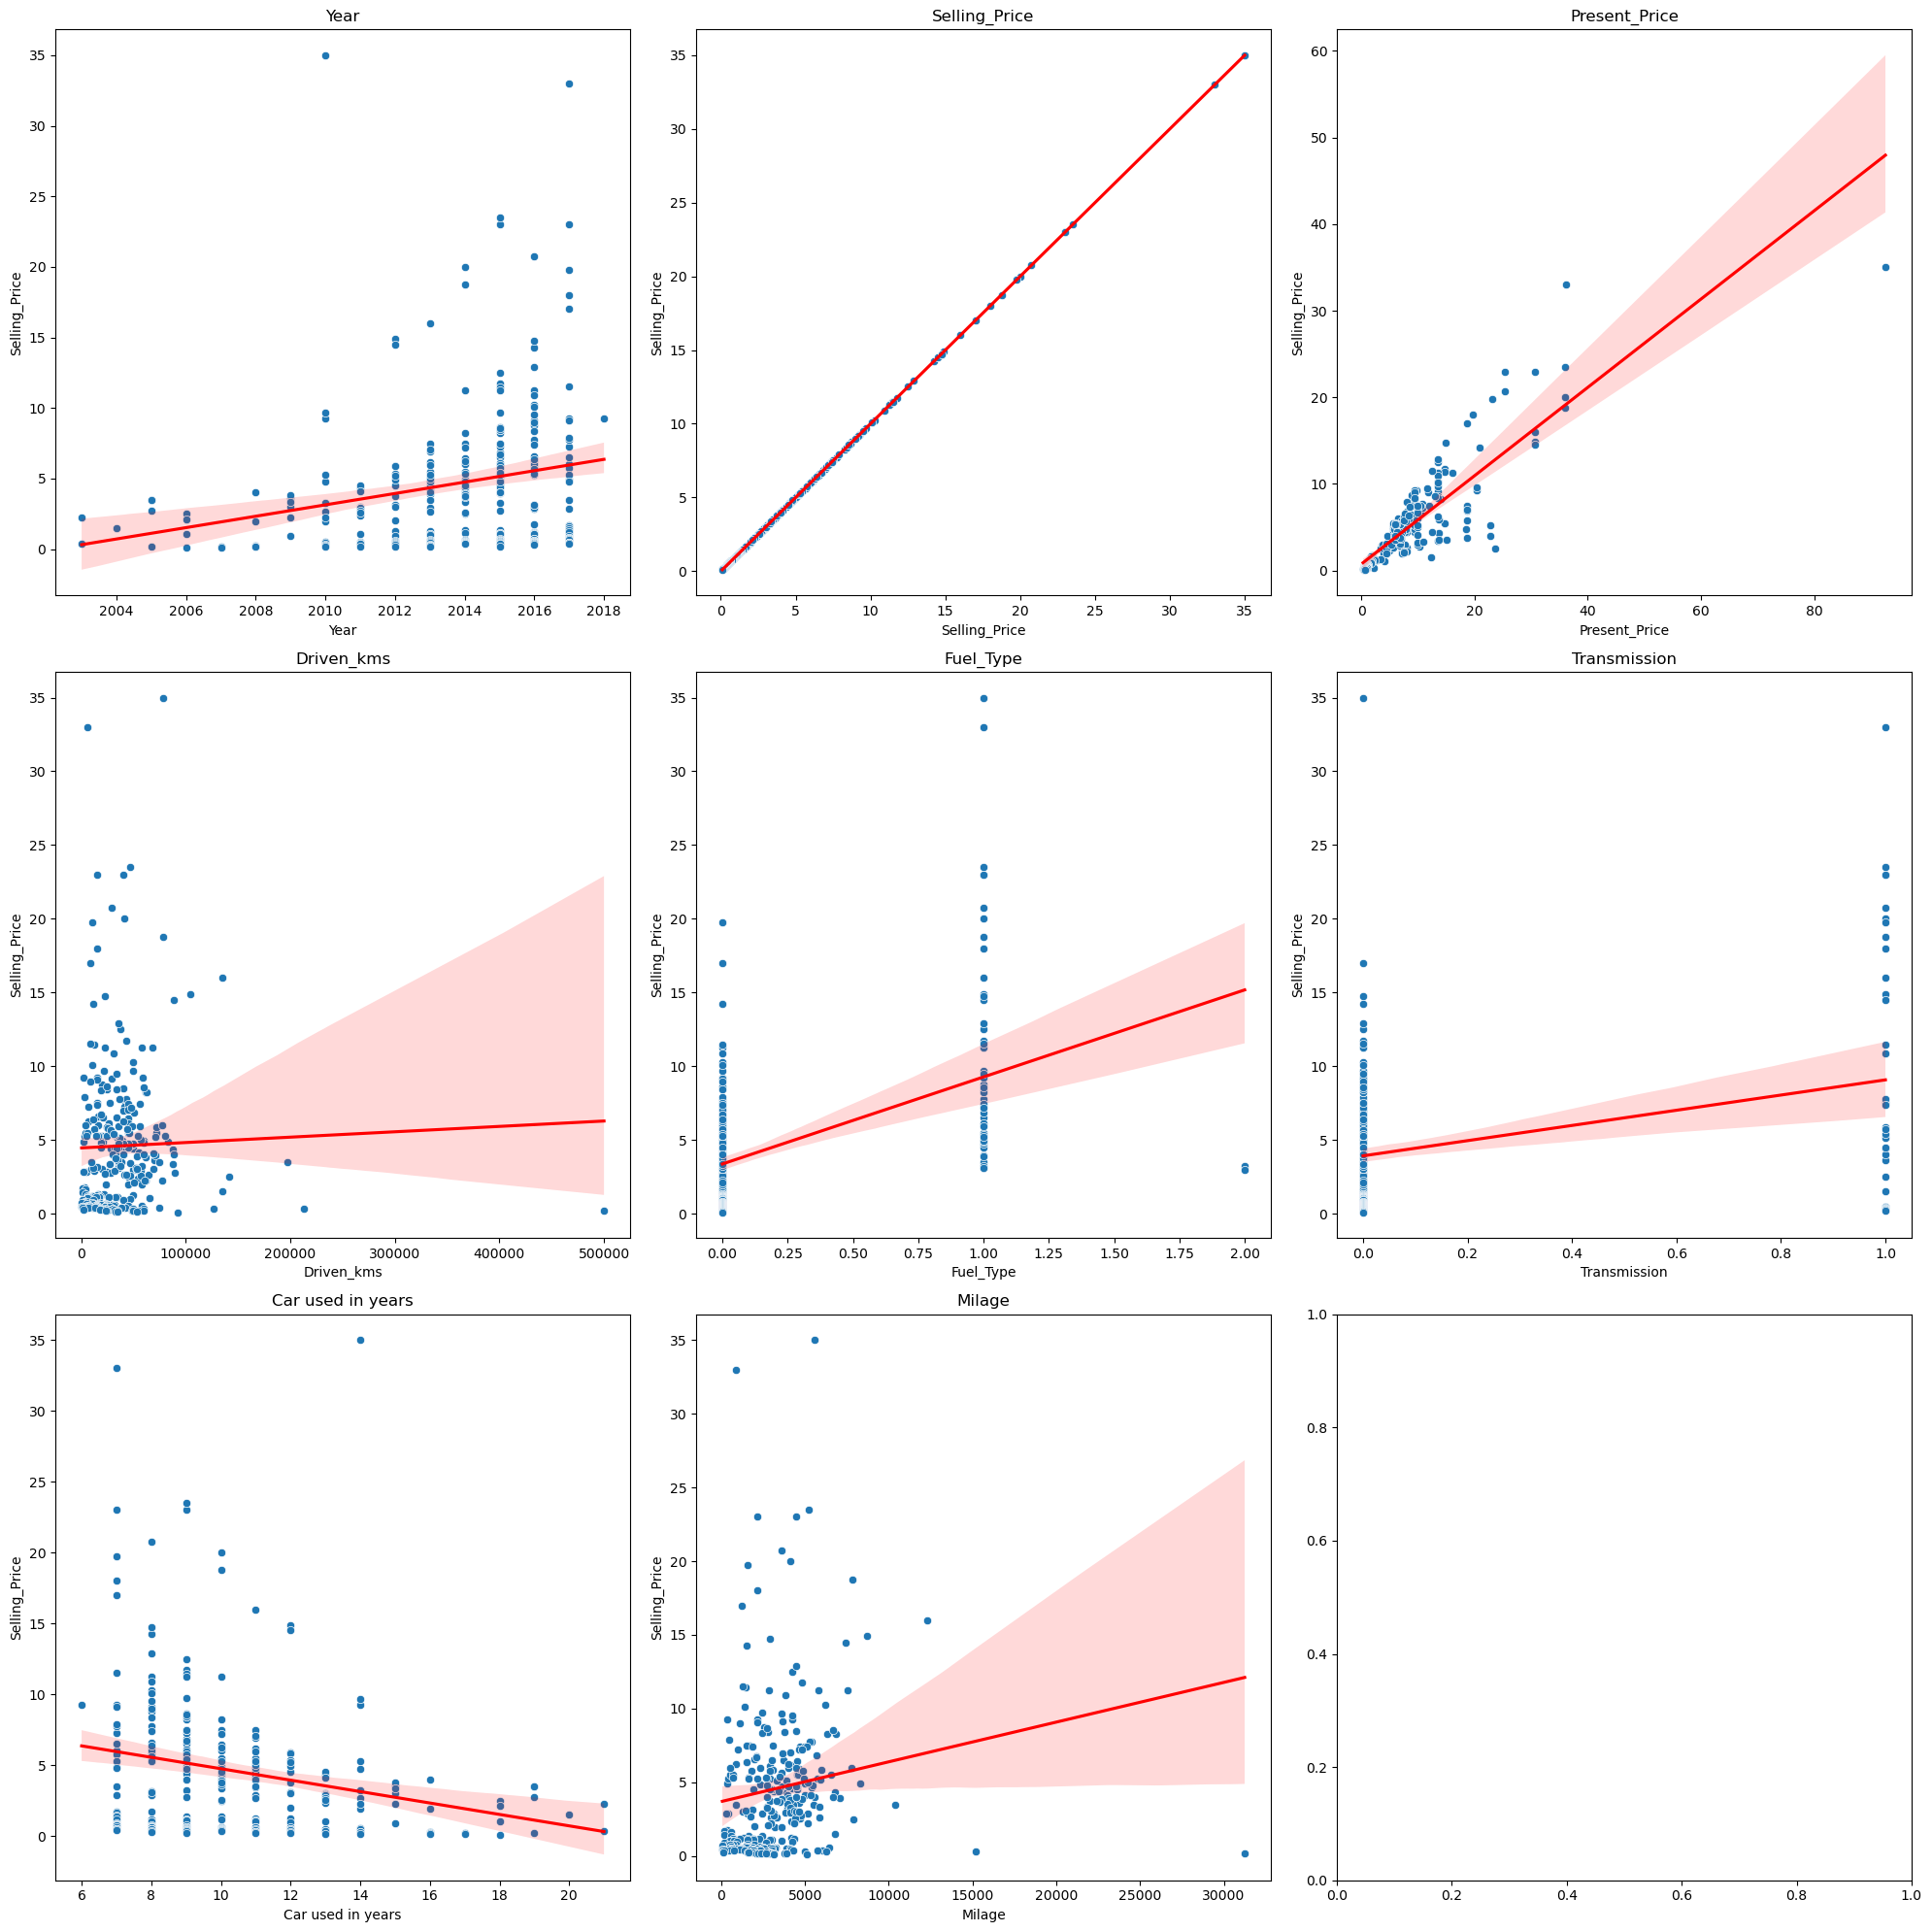

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for i, feature in enumerate(num.columns):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=num[feature], y=num['Selling_Price'], ax=axes[row, col])
    axes[row, col].set_title(feature)
    
    # Plot linear regression line
    sns.regplot(x=num[feature], y=num['Selling_Price'], ax=axes[row, col], scatter=False, color='red')
    
plt.tight_layout()
plt.show()


All the feature seems to have linear relation with the selling price.

**Model Training, Model selection** 

In [32]:
X = data.drop(['Selling_Price', 'Selling_type', 'Fuel_Type', 'Transmission'], axis = 1) #feature 
y = data['Selling_Price'] #target 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

1. Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

2. Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

#hyperparameter tuning
param_grid_dtr = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtr_grid_search = GridSearchCV(dtr, param_grid_dtr, cv=5, scoring='neg_mean_squared_error')
dtr_grid_search.fit(X_train, y_train)
best_dtr = dtr_grid_search.best_estimator_
y_pred_dtr = best_dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)


3. Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

4. Gradient Boosting Regressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.5]
}

gb_grid_search = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb = gb_grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)


5. Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
ridge_grid_search = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
best_ridge = ridge_grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

6. Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso()
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
lasso_grid_search = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)
best_lasso = lasso_grid_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [41]:
# Compare R-squared scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ridge Regression', 'Lasso Regression']
r2_scores = [r2_lr, r2_dtr, r2_rf, r2_gb, r2_ridge, r2_lasso]

Linear Regression: R-squared = 0.7273986964330047
Decision Tree: R-squared = 0.7083539179377514
Random Forest: R-squared = 0.5572354021911992
Gradient Boosting: R-squared = 0.7578986012287248
Ridge Regression: R-squared = 0.7220889652444512
Lasso Regression: R-squared = 0.7273174612057368


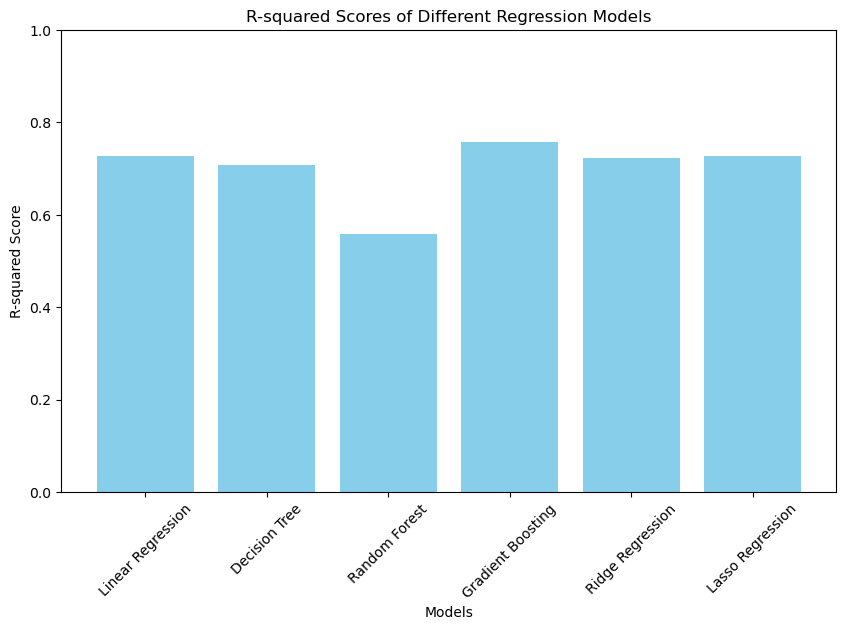

In [42]:
for model, r2_score in zip(models, r2_scores):
    print(f"{model}: R-squared = {r2_score}")

# Plot R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.title('R-squared Scores of Different Regression Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [43]:
# Select the model with the highest R-squared score
best_model_idx = np.argmax(r2_scores)
best_model = models[best_model_idx]
best_r2_score = r2_scores[best_model_idx]
print(f"The best model is {best_model} with an R-squared score of {best_r2_score}.")

The best model is Gradient Boosting with an R-squared score of 0.7578986012287248.


In [44]:
# Model Interpretation
# Feature Importance
feature_importance = best_gb.feature_importances_
feature_names = X_train.columns

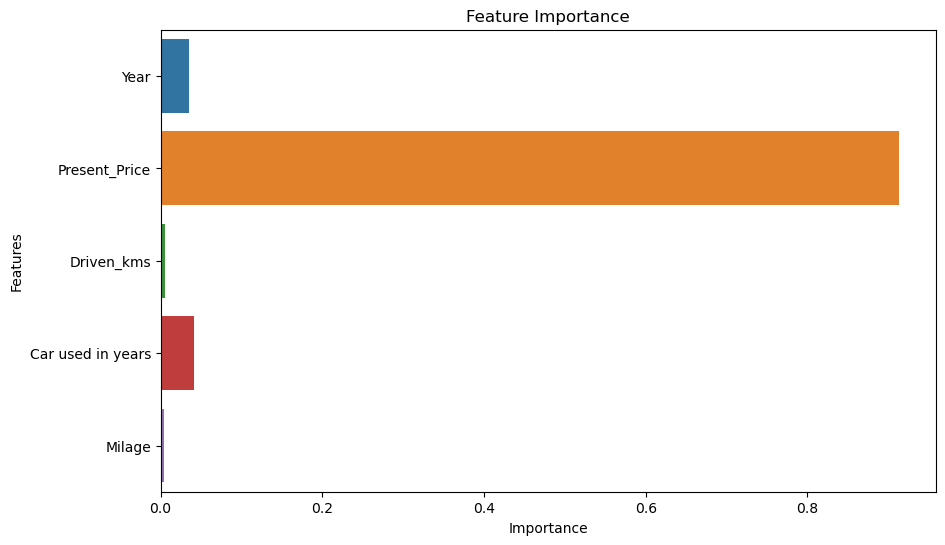

In [45]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

From here, we can say that present price of car is most important feature which decides major selling price of a car. The car used in years and Year in which it was launched is second most important features.

In [46]:
#Model Evaluation
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R2):", r2_gb)

Mean Squared Error (MSE): 6.239742834898866
R-squared (R2): 0.7578986012287248


## - Project by
### Vaishanvi Patel